Chapter 11
# 热图
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

### 导入鸢尾花数据

In [3]:
iris = load_iris()
# 从sklearn导入鸢尾花数据

X = iris.data
y = iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 创建数据帧

In [4]:
feature_names = ['Sepal length, $X_1$','Sepal width, $X_2$',
                 'Petal length, $X_3$','Petal width, $X_4$']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)

In [5]:
X_df.describe()

,"Sepal length, $X_1$","Sepal width, $X_2$","Petal length, $X_3$","Petal width, $X_4$"
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 可视化鸢尾花四个量化特征数据

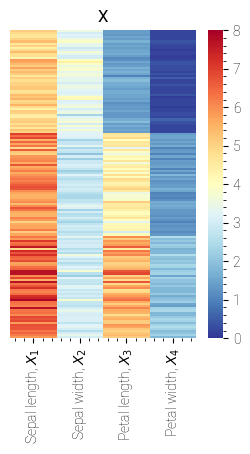

In [6]:
fig, ax = plt.subplots(figsize = (3,4))
ax = sns.heatmap(X_df, # 数据
                 cmap='RdYlBu_r', # 色谱
                 xticklabels=list(X_df.columns), # 横轴标签
                 yticklabels=False, # 关闭纵轴标签
                 cbar_kws={"orientation": "vertical"}, # 色谱条行为
                 vmin=0, vmax=8) # 色谱最小、最大值
plt.title('X')

fig.savefig('Figures/鸢尾花数据.svg', format='svg')

### 聚类热图

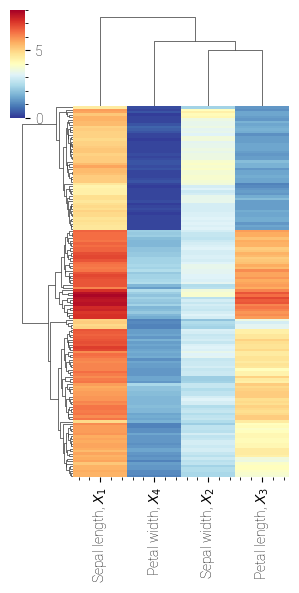

In [7]:
ax = sns.clustermap(X_df,
                    cmap='RdYlBu_r',
                    xticklabels=list(X_df.columns),
                    yticklabels=False,
                    figsize = (3,6),
                    vmin=0, vmax=8)

plt.savefig('Figures/热图 + 树状图.svg', format='svg')

### 计算格拉姆矩阵
$ G = X^TX$

In [8]:
G = X.T @ X
print(G.max())
print(G.min())

5223.850000000001
302.33


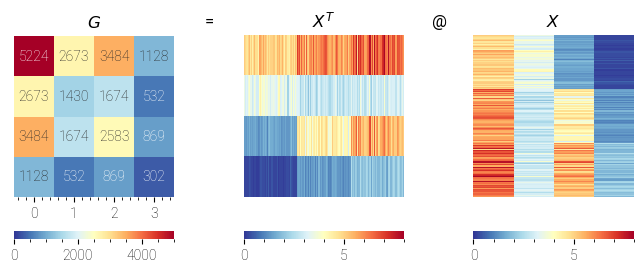

In [9]:
fig,axs = plt.subplots(1,5,figsize = (8,3), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])
ax = sns.heatmap(G, cmap = 'RdYlBu_r',
                 vmax = 5000, vmin = 0,
                 annot = True,
                 fmt=".0f",
                 cbar_kws = {'orientation':'horizontal'},
                 yticklabels=False,
                 square = 'equal')
plt.title('$G$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(X.T, cmap = 'RdYlBu_r',
                 vmax = 0, vmin = 8,
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels = False,
                 annot=False)
plt.title('$X^T$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

plt.sca(axs[4])
ax = sns.heatmap(X, cmap = 'RdYlBu_r',
                 vmax = 0, vmin = 8,
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 annot=False)
plt.title('$X$')

fig.savefig('Figures/格拉姆矩阵.svg', format='svg')

### 上三角

<AxesSubplot:>

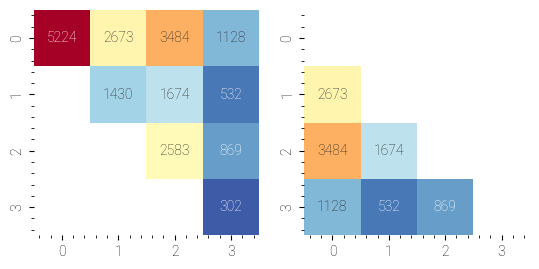

In [10]:
mask_tri = np.zeros_like(G)
mask_tri[np.triu_indices_from(mask_tri)] = True
mask_tri = mask_tri.astype(dtype=bool)

fig, axs = plt.subplots(1, 2)

sns.heatmap(G, ax = axs[0],
            vmax = 5000, vmin = 0,
            annot = True,
            fmt=".0f",
            cmap = 'RdYlBu_r',
            square = True, 
            mask = ~mask_tri,
            cbar = False,
            linecolor = [0.5, 0.5, 0.5])

sns.heatmap(G, ax = axs[1],
            vmax = 5000, vmin = 0,
            cmap = 'RdYlBu_r',
            annot = True,
            fmt=".0f",
            square = True,
            mask = mask_tri,
            cbar = False,
            linecolor = [0.5, 0.5, 0.5])



### Cholesky分解
Chol of G:  
$ G = LL^T$

In [11]:
L = np.linalg.cholesky(G)
L

array([[ 72.27620632,   0.        ,   0.        ,   0.        ],
       [ 36.98907477,   7.88722685,   0.        ,   0.        ],
       [ 48.20064828, -13.76876634,   8.3563496 ,   0.        ],
       [ 15.60873291,  -5.76407773,   4.47500611,   2.33392057]])

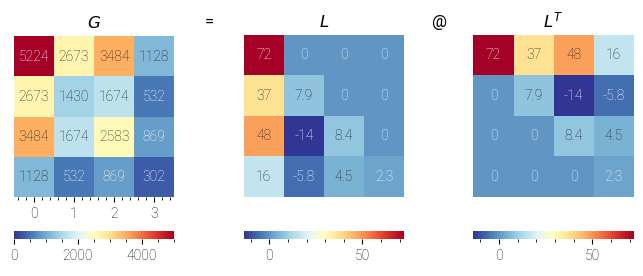

In [12]:
fig,axs = plt.subplots(1,5,figsize = (8,3), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])
ax = sns.heatmap(G, cmap = 'RdYlBu_r',
                 vmax = 5000, vmin = 0,
                 cbar_kws = {'orientation':'horizontal'},
                 yticklabels=False,
                 annot=True,
                 fmt=".0f",
                 square = 'equal')
plt.title('$G$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(L, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels = False,
                 annot=True)
plt.title('$L$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

plt.sca(axs[4])
ax = sns.heatmap(L.T, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 annot=True)
plt.title('$L^T$')

fig.savefig('Figures/格拉姆矩阵，Chol.svg', format='svg')

### 特征值分解
EVD of G:  
$G = V \Lambda V^T$

In [13]:
Lambdas, V = np.linalg.eig(G)
print(Lambdas)
print(V)

[9.20830507e+03 3.15454317e+02 1.19780429e+01 3.55257020e+00]
[[ 0.75110816  0.2841749   0.50215472  0.32081425]
 [ 0.38008617  0.5467445  -0.67524332 -0.31725607]
 [ 0.51300886 -0.70866455 -0.05916621 -0.48074507]
 [ 0.16790754 -0.34367081 -0.53701625  0.75187165]]


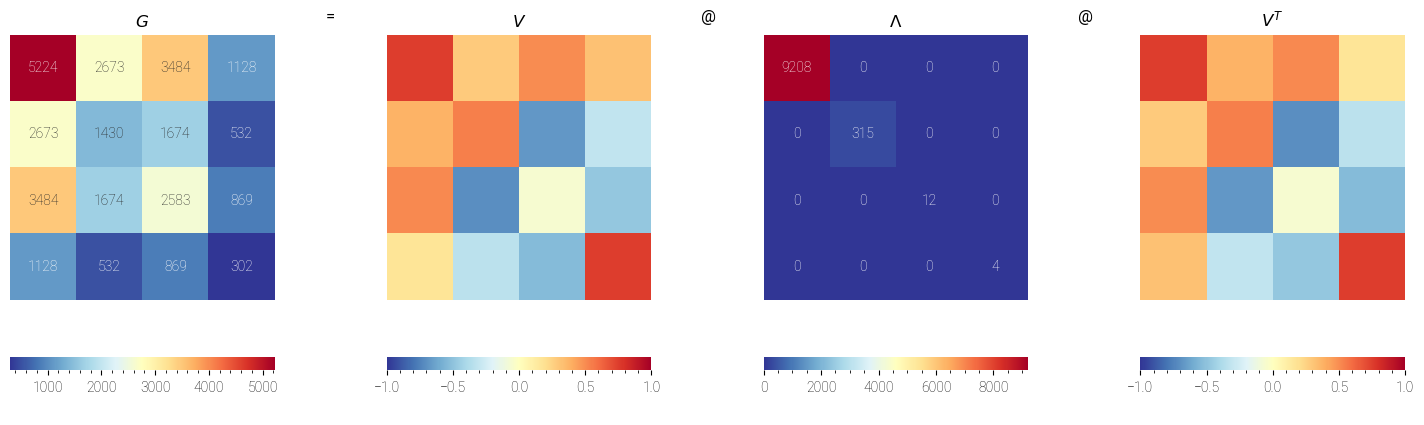

In [14]:
fig,axs = plt.subplots(1,7,figsize = (18,5), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])
ax = sns.heatmap(G, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 annot=True,
                 fmt=".0f",                 
                 yticklabels=False,
                 xticklabels=False,
                 square = 'equal')
plt.title('$G$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(V, cmap = 'RdYlBu_r',
                vmax = 1, vmin = -1,
                cbar_kws = {'orientation':'horizontal'},
                xticklabels = False,
                yticklabels = False,
                square = 'equal')
plt.title('$V$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

plt.sca(axs[4])
ax = sns.heatmap(np.diag(Lambdas), cmap = 'RdYlBu_r',
                # vmax = D_max, vmin = D_min,
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels = False,
                 annot=True,
                 fmt=".0f",                 
                square = 'equal')
plt.title('$\Lambda$')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')    

plt.sca(axs[6])
ax = sns.heatmap(V.T, cmap = 'RdYlBu_r',
                vmax = 1, vmin = -1,
                cbar_kws = {'orientation':'horizontal'},
                yticklabels=False,
                xticklabels=False,
                square = 'equal')
plt.title('$V^T$')

fig.savefig('Figures/格拉姆矩阵，EVD.svg', format='svg')

### 奇异值分解
SVD of X:  
$X = USV^T$

In [15]:
U,S,VT = np.linalg.svd(X, full_matrices = False)
V = VT.T

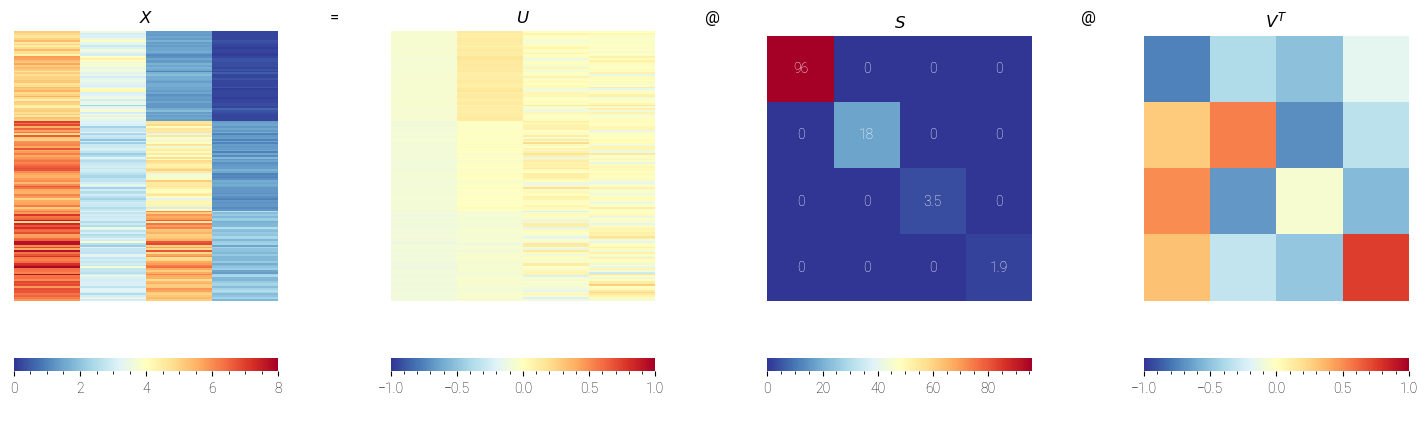

In [16]:
fig,axs = plt.subplots(1,7,figsize = (18,5), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])
ax = sns.heatmap(X, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 vmin = 0, vmax = 8,
                 yticklabels=False,
                 xticklabels = False)
plt.title('$X$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(U, cmap = 'RdYlBu_r',
                vmax = 1, vmin = -1,
                cbar_kws = {'orientation':'horizontal'},
                xticklabels = False,
                yticklabels=False)
plt.title('$U$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

plt.sca(axs[4])
ax = sns.heatmap(np.diag(S), cmap = 'RdYlBu_r',
                # vmax = D_max, vmin = D_min,
                cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                yticklabels=False,
                 annot=True,
                square = 'equal')
plt.title('$S$')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')    

plt.sca(axs[6])
ax = sns.heatmap(V.T, cmap = 'RdYlBu_r',
                vmax = 1, vmin = -1,
                cbar_kws = {'orientation':'horizontal'},
                yticklabels=False,
                xticklabels=False,
                square = 'equal')
plt.title('$V^T$')

fig.savefig('Figures/奇异值分解，SVD.svg', format='svg')

### 统计

In [17]:
# 协方差矩阵
Sigma = X_df.cov()
Corr  = X_df.corr()

<AxesSubplot:>

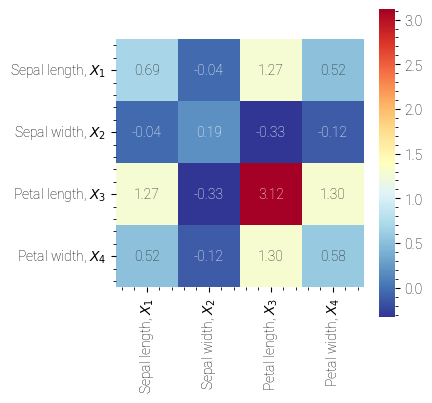

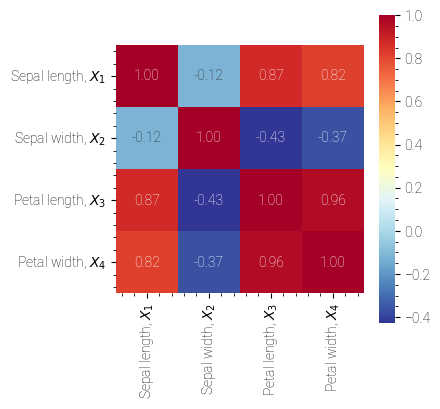

In [18]:

fig, ax = plt.subplots(figsize = (4,4))

sns.heatmap(Sigma, ax = ax,
            annot = True,
            fmt=".2f",
            cmap = 'RdYlBu_r',
            square = True, 
            cbar_kws = {'orientation':'vertical'},
            linecolor = [0.5, 0.5, 0.5])

fig, ax = plt.subplots(figsize = (4,4))

sns.heatmap(Corr, ax = ax,
            cmap = 'RdYlBu_r',
            annot = True,
            fmt=".2f",
            square = True,
            cbar_kws = {'orientation':'vertical'},
            linecolor = [0.5, 0.5, 0.5])

In [19]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023